In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sb

In [128]:
#ccx train 
ccx = pd.read_csv('ccx_A_train.csv', encoding='gb2312')
ccx.head()

,lend_request_id,qm,type,result,instid,instType
0,1,2,T0,R0,B0,A0
1,3,2,T1,R0,B1,A0
2,3,2,T2,R1,B2,A1
3,3,2,T3,R2,B3,A2
4,6,2,T4,R3,B4,A3


In [129]:
#drop qm column
ccx1 = ccx.drop(['qm'],axis = 1)
ccx1.head()

,lend_request_id,type,result,instid,instType
0,1,T0,R0,B0,A0
1,3,T1,R0,B1,A0
2,3,T2,R1,B2,A1
3,3,T3,R2,B3,A2
4,6,T4,R3,B4,A3


In [130]:
#count the number of each search result and store it in a new dataframe
ccx2 = pd.DataFrame(ccx1.groupby(['lend_request_id','result']).size())
ccx2.columns=['count']
ccx2.head()

count
lend_request_id result       
1               R0          1
3               R0          1
                R1          1
                R2          2
6               R3          1

In [131]:
#transpose the result into personal level
ccx_result = pd.DataFrame(ccx2.groupby(['lend_request_id', 'result'])['count'].first().unstack(fill_value='').rename_axis(None, 1))
ccx_result.head()

,R0,R1,R10,R11,R12,R13,R14,R15,R16,R17,...,R22,R23,R24,R3,R4,R5,R6,R7,R8,R9
lend_request_id,,,,,,,,,,,,,,,,,,,,,
1,1,,,,,,,,,,...,,,,,,,,,,
3,1,1,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,1,,,,,,
8,,,,,,,,,,,...,,,,1,,,,,,
9,1,,,,,,,,,,...,,,,,,,,,,


In [145]:
#export dataframe to csv file
ccx_result.to_csv(r'ccx_final.csv')

In [133]:
#consumer train 
consumer = pd.read_csv('Consumer_train.csv')
consumer.head()

,ccx_id,province,city,area,fare,goodsvalue,orderamount,paymenttime,platform,refund,discount,ordertime,deliveryNum,unitPrice,goodsName
0,1,Shandong,济宁,任城,10.0,38.0,48.0,6/4/15 09:41,淘宝分销,0.0,0.0,0000-00-00 00:00:00,1.0,38.0,书籍/杂志/报纸
1,1,Shandong,济宁,任城,10.0,38.0,48.0,6/4/15 09:41,淘宝分销,0.0,0.0,6/3/15 23:04,1.0,38.0,书籍/杂志/报纸
2,1,Jiangsu,徐州,新沂,0.0,25.0,25.0,11/28/15 20:36,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,25.0,书籍/杂志/报纸
3,1,Jiangsu,徐州,新沂,0.0,49.5,49.5,7/9/14 10:08,淘宝,0.0,0.0,0000-00-00 00:00:00,1.0,49.5,女士内衣/男士内衣/家居服
4,1,Jiangsu,徐州,新沂,0.0,12.8,12.8,10/14/16 22:16,淘宝,0.0,27.0,10/14/16 22:16,1.0,12.8,书籍/杂志/报纸


In [134]:
#Only use orderamount and goosName 
consumer2 = consumer.loc[:,('ccx_id','orderamount','goodsName')]
consumer2.head()

,ccx_id,orderamount,goodsName
0,1,48.0,书籍/杂志/报纸
1,1,48.0,书籍/杂志/报纸
2,1,25.0,书籍/杂志/报纸
3,1,49.5,女士内衣/男士内衣/家居服
4,1,12.8,书籍/杂志/报纸


In [135]:
# sum up the total amount spent in each category for every consumer
consumer_result = pd.DataFrame(consumer2.groupby(['ccx_id', 'goodsName'])['orderamount'].first().unstack(fill_value='').rename_axis(None, 1))
consumer_result.head()

,3C数码配件,OTC药品/医疗器械/计生用品,ZIPPO/瑞士军刀/眼镜,个人护理/保健/按摩器材,乐器/吉他/钢琴/配件,书籍/杂志/报纸,五金/工具,传统滋补营养品,住宅家具,保健食品/膳食营养补充食品,...,运动服/休闲服装,运动鞋new,酒类,闪存卡/U盘/存储/移动硬盘,隐形眼镜/护理液,零食/坚果/特产,音乐/影视/明星/音像,餐饮具,饰品/流行首饰/时尚饰品新,鲜花速递/花卉仿真/绿植园艺
ccx_id,,,,,,,,,,,,,,,,,,,,,
1,58,,,,,48,,,,216,...,,,,,,,,,,
2,,,,,,10.8,,,,,...,,,,,,,,,,
3,,,,,,169,,,,,...,17,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,


In [136]:
consumer_result=consumer_result.convert_objects(convert_numeric=True)

/Users/Cindy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [137]:
#reclassify the 74 categories into 10 big categories
consumer_result['it_buy']=consumer_result[['闪存卡/U盘/存储/移动硬盘','平板电脑/MID','电脑硬件/显示器/电脑周边','3C数码配件',
                                           '手机号码/套餐/增值业务','网络设备/网络相关','手机']].sum(axis=1)
consumer_result['clothing_buy']=consumer_result[['女士内衣/男士内衣/家居服', '女装/女士精品', '男装', '流行男鞋', '运动服/休闲服装', '运动鞋new', '饰品/流行首饰/时尚饰品新','女鞋', '手表',  '珠宝/钻石/翡翠/黄金','服饰配件/皮带/帽子/围巾', '童鞋/婴儿鞋/亲子鞋',  '童装/婴儿装/亲子装', '箱包皮具/热销女包/男包']].sum(axis=1)
consumer_result['food_buy']=consumer_result[['粮油米面/南北干货/调味品','保健食品/膳食营养补充食品', '零食/坚果/特产','咖啡/麦片/冲饮','茶', '传统滋补营养品', '奶粉/辅食/营养品/零食', '水产肉类/新鲜蔬果/熟食', '酒类']].sum(axis=1)
consumer_result['home_buy']=consumer_result[[ '住宅家具','洗护清洁剂/卫生巾/纸/香薰', '居家日用', '家居饰品','厨房/烹饪用具', '餐饮具', '居家布艺', '商业/办公家具', '家庭/个人清洁工具', '床上用品','收纳整理', '厨房电器', '大家电',  '生活电器']].sum(axis=1)
consumer_result['ent_buy']=consumer_result[['影音电器', '音乐/影视/明星/音像',  '模玩/动漫/周边/cos/桌游', '玩具/童车/益智/积木/模型', '乐器/吉他/钢琴/配件']].sum(axis=1)
consumer_result['tools_buy']=consumer_result[['电子/电工', '基础建材', '五金/工具','办公设备/耗材/相关服务']].sum(axis=1)
consumer_result['stationery_buy']=consumer_result[['书籍/杂志/报纸', '电子词典/电纸书/文化用品', '节庆用品/礼品']].sum(axis=1)  
consumer_result['health_buy'] =consumer_result[['OTC药品/医疗器械/计生用品', '处方药',  '个人护理/保健/按摩器材', '运动/瑜伽/健身/球迷用品', '户外/登山/野营/旅行用品','自行车/骑行装备/零配件']].sum(axis=1)
consumer_result['skincare_buy']=consumer_result[['彩妆/香水/美妆工具', '美容护肤/美体/精油', '隐形眼镜/护理液']].sum(axis=1)
consumer_result['other_buy'] =consumer_result[['其他',  'ZIPPO/瑞士军刀/眼镜',  '汽车/用品/配件/改装','宠物/宠物食品及用品', '鲜花速递/花卉仿真/绿植园艺', '尿片/洗护/喂哺/推车床', '家装主材']].sum(axis=1)


In [138]:
# slice the dataframe
consumer_result2=consumer_result.iloc[:,74::]
consumer_result2.head()

,it_buy,clothing_buy,food_buy,home_buy,ent_buy,tools_buy,stationery_buy,health_buy,skincare_buy,other_buy
ccx_id,,,,,,,,,,
1,58.0,177.5,230.5,9.41,0.0,0.0,48.0,26.9,26.0,0.0
2,0.0,0.0,0.0,0.00,0.0,0.0,10.8,0.0,22.9,0.0
3,0.0,17.0,0.0,39.52,0.0,0.0,169.0,0.0,0.0,0.0
4,0.0,0.0,93.7,1013.00,0.0,0.0,0.0,0.0,0.0,179.0
6,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,26.8


In [139]:
#count the number of times each consumer shopped in each category
consumer3=pd.DataFrame(consumer2.groupby(['ccx_id','goodsName']).size())
consumer3.columns=['count']
consumer3.head()

count
ccx_id goodsName           
1      3C数码配件             4
       书籍/杂志/报纸           8
       保健食品/膳食营养补充食品      1
       女士内衣/男士内衣/家居服      1
       女装/女士精品            1

In [140]:
#transpose the result into personal level
consumer_result3 = pd.DataFrame(consumer3.groupby(['ccx_id', 'goodsName'])['count'].first().unstack(fill_value='').rename_axis(None, 1))
consumer_result3.head()

,3C数码配件,OTC药品/医疗器械/计生用品,ZIPPO/瑞士军刀/眼镜,个人护理/保健/按摩器材,乐器/吉他/钢琴/配件,书籍/杂志/报纸,五金/工具,传统滋补营养品,住宅家具,保健食品/膳食营养补充食品,...,运动服/休闲服装,运动鞋new,酒类,闪存卡/U盘/存储/移动硬盘,隐形眼镜/护理液,零食/坚果/特产,音乐/影视/明星/音像,餐饮具,饰品/流行首饰/时尚饰品新,鲜花速递/花卉仿真/绿植园艺
ccx_id,,,,,,,,,,,,,,,,,,,,,
1,4,,,,,8,,,,1,...,,,,,,,,,,
2,,,,,,1,,,,,...,,,,,,,,,,
3,,,,,,4,,,,,...,1,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
6,,,,,,,,,,,...,,,,,,,,,,


In [141]:
#change data type to numerical
consumer_result3=consumer_result3.convert_objects(convert_numeric=True)

/Users/Cindy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [142]:
#reclassify the 74 categories into 10 big categories
consumer_result3['it_buy_count']=consumer_result3[['闪存卡/U盘/存储/移动硬盘','平板电脑/MID','电脑硬件/显示器/电脑周边','3C数码配件',
                                           '手机号码/套餐/增值业务','网络设备/网络相关','手机']].sum(axis=1)
consumer_result3['clothing_buy_count']=consumer_result3[['女士内衣/男士内衣/家居服', '女装/女士精品', '男装', '流行男鞋', '运动服/休闲服装', '运动鞋new', '饰品/流行首饰/时尚饰品新','女鞋', '手表',  '珠宝/钻石/翡翠/黄金','服饰配件/皮带/帽子/围巾', '童鞋/婴儿鞋/亲子鞋',  '童装/婴儿装/亲子装', '箱包皮具/热销女包/男包']].sum(axis=1)
consumer_result3['food_buy_count']=consumer_result3[['粮油米面/南北干货/调味品','保健食品/膳食营养补充食品', '零食/坚果/特产','咖啡/麦片/冲饮','茶', '传统滋补营养品', '奶粉/辅食/营养品/零食', '水产肉类/新鲜蔬果/熟食', '酒类']].sum(axis=1)
consumer_result3['home_buy_count']=consumer_result3[[ '住宅家具','洗护清洁剂/卫生巾/纸/香薰', '居家日用', '家居饰品','厨房/烹饪用具', '餐饮具', '居家布艺', '商业/办公家具', '家庭/个人清洁工具', '床上用品','收纳整理', '厨房电器', '大家电',  '生活电器']].sum(axis=1)
consumer_result3['ent_buy_count']=consumer_result3[['影音电器', '音乐/影视/明星/音像',  '模玩/动漫/周边/cos/桌游', '玩具/童车/益智/积木/模型', '乐器/吉他/钢琴/配件']].sum(axis=1)
consumer_result3['tools_buy_count']=consumer_result3[['电子/电工', '基础建材', '五金/工具','办公设备/耗材/相关服务']].sum(axis=1)
consumer_result3['stationery_buy_count']=consumer_result3[['书籍/杂志/报纸', '电子词典/电纸书/文化用品', '节庆用品/礼品']].sum(axis=1)  
consumer_result3['health_buy_count'] =consumer_result3[['OTC药品/医疗器械/计生用品', '处方药',  '个人护理/保健/按摩器材', '运动/瑜伽/健身/球迷用品', '户外/登山/野营/旅行用品','自行车/骑行装备/零配件']].sum(axis=1)
consumer_result3['skincare_buy_count']=consumer_result3[['彩妆/香水/美妆工具', '美容护肤/美体/精油', '隐形眼镜/护理液']].sum(axis=1)
consumer_result3['other_buy_count'] =consumer_result3[['其他',  'ZIPPO/瑞士军刀/眼镜',  '汽车/用品/配件/改装','宠物/宠物食品及用品', '鲜花速递/花卉仿真/绿植园艺', '尿片/洗护/喂哺/推车床', '家装主材']].sum(axis=1)
#slicing the result
consumer_result4=consumer_result3.iloc[:,74::]
consumer_result4.head()

,it_buy_count,clothing_buy_count,food_buy_count,home_buy_count,ent_buy_count,tools_buy_count,stationery_buy_count,health_buy_count,skincare_buy_count,other_buy_count
ccx_id,,,,,,,,,,
1,4.0,2.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [143]:
#merge two dataframe 
consumer_final = pd.concat([consumer_result2,consumer_result4], axis=1, join='inner')
consumer_final.head()

,it_buy,clothing_buy,food_buy,home_buy,ent_buy,tools_buy,stationery_buy,health_buy,skincare_buy,other_buy,it_buy_count,clothing_buy_count,food_buy_count,home_buy_count,ent_buy_count,tools_buy_count,stationery_buy_count,health_buy_count,skincare_buy_count,other_buy_count
ccx_id,,,,,,,,,,,,,,,,,,,,
1,58.0,177.5,230.5,9.41,0.0,0.0,48.0,26.9,26.0,0.0,4.0,2.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.00,0.0,0.0,10.8,0.0,22.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,17.0,0.0,39.52,0.0,0.0,169.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
4,0.0,0.0,93.7,1013.00,0.0,0.0,0.0,0.0,0.0,179.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,26.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [123]:
#export the final result into csv file
consumer_final.to_csv(r'consumer_final.csv')

NameError: name 'consumer_final' is not defined

In [2]:
df = pd.read_csv('merge_final.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'ccx_id', 'age', 'gender', 'ASSETS_Own_Car',
       'ASSETS_Own_House', 'ASSETS_Rent_House', 'STATUS_College_Student',
       'STATUS_Have_Child', 'STATUS_Job_Rider', 'STATUS_Job_Sales',
       'STATUS_Job_Seek_IT', 'STATUS_Job_Weishang', 'STATUS_Study_Civil',
       'STATUS_Taxi_Driver', 'STATUS_Track_Driver', 'SYS_Battery',
       'SYS_Browser', 'SYS_Input', 'SYS_Market&Security', 'SYS_NetDisk',
       'SYS_OtherTool', 'SYS_Time_Weather', 'SYS_Wallpaper', 'SYS_Wifi',
       'bus_deg', 'edu_deg', 'loan_deg', 'other_fin_deg', 'ent_deg',
       'health_deg', 'life_deg', 'lottery_deg', 'travel_deg', 'news_deg',
       'social_deg', 'shop_deg', 'sport_deg', 'career_level', 'edu_level',
       'location_level', 'R0', 'R1', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15',
       'R16', 'R17', 'R18', 'R19', 'R2', 'R20', 'R21', 'R22', 'R23', 'R24',
       'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'it_buy', 'clothing_buy',
       'food_buy', 'home_buy', 'ent_buy', 'tools_buy', 's

In [4]:
drop_columns = ['Unnamed: 0','STATUS_College_Student', 'STATUS_Have_Child','SYS_Battery','SYS_Browser', 'SYS_Input', 'SYS_Market&Security', 'SYS_NetDisk',
               'SYS_OtherTool', 'SYS_Time_Weather', 'SYS_Wallpaper', 'SYS_Wifi','STATUS_College_Student',
       'STATUS_Have_Child', 'STATUS_Job_Rider', 'STATUS_Job_Sales',
       'STATUS_Job_Seek_IT', 'STATUS_Job_Weishang', 'STATUS_Study_Civil',
       'STATUS_Taxi_Driver', 'STATUS_Track_Driver', 'SYS_Battery','ASSETS_Own_Car', 'ASSETS_Own_House',
       'ASSETS_Rent_House']
# ,'bus_deg','loan_deg', 'other_fin_deg', 'ent_deg'
df=df.drop(drop_columns, axis=1)

In [5]:
df.columns

Index(['ccx_id', 'age', 'gender', 'bus_deg', 'edu_deg', 'loan_deg',
       'other_fin_deg', 'ent_deg', 'health_deg', 'life_deg', 'lottery_deg',
       'travel_deg', 'news_deg', 'social_deg', 'shop_deg', 'sport_deg',
       'career_level', 'edu_level', 'location_level', 'R0', 'R1', 'R10', 'R11',
       'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R2', 'R20',
       'R21', 'R22', 'R23', 'R24', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9',
       'it_buy', 'clothing_buy', 'food_buy', 'home_buy', 'ent_buy',
       'tools_buy', 'stationery_buy', 'health_buy', 'skincare_buy',
       'other_buy', 'it_buy_count', 'clothing_buy_count', 'food_buy_count',
       'home_buy_count', 'ent_buy_count', 'tools_buy_count',
       'stationery_buy_count', 'health_buy_count', 'skincare_buy_count',
       'other_buy_count', 'target'],
      dtype='object')

In [6]:
df.head()

,ccx_id,age,gender,bus_deg,edu_deg,loan_deg,other_fin_deg,ent_deg,health_deg,life_deg,...,clothing_buy_count,food_buy_count,home_buy_count,ent_buy_count,tools_buy_count,stationery_buy_count,health_buy_count,skincare_buy_count,other_buy_count,target
0,1,26,1,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,2.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0,0
1,8,21,0,3.0,0.0,4621.0,5425.615385,14.25,0.0,3.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
2,10,33,0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0
3,17,37,0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
4,19,43,0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [7]:
cols = ['loan_deg','other_fin_deg', 'ent_deg']
df[cols] = df[cols].replace(0.0, np.nan)

In [8]:
cols_median=['loan_deg','other_fin_deg', 'ent_deg']

df[cols_median]=df[cols_median].apply(lambda x: x.fillna(x.median()))

In [9]:
df.head()

,ccx_id,age,gender,bus_deg,edu_deg,loan_deg,other_fin_deg,ent_deg,health_deg,life_deg,...,clothing_buy_count,food_buy_count,home_buy_count,ent_buy_count,tools_buy_count,stationery_buy_count,health_buy_count,skincare_buy_count,other_buy_count,target
0,1,26,1,0.0,0.0,5142.0,3785.327998,33.00,0.0,0.0,...,2.0,2.0,1.0,0.0,0.0,8.0,1.0,1.0,0.0,0
1,8,21,0,3.0,0.0,4621.0,5425.615385,14.25,0.0,3.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
2,10,33,0,0.0,0.0,5142.0,3785.327998,33.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0
3,17,37,0,0.0,0.0,5142.0,3785.327998,33.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
4,19,43,0,0.0,0.0,5142.0,3785.327998,33.00,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

Your selected dataframe has 65 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
df.groupby('target').size()

target
0    5442
1    3707
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("Precision score   : ", precision_score(predictions,dtest_Y))

    print ("confusion matrix : \n", confusion_matrix(predictions,dtest_Y)/len(dtest_Y))


    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")
    ax.set_facecolor("k")

In [14]:
from sklearn.utils import resample
df_majority = df[df["target"] == 0]
df_minority = df[df["target"] == 1]

df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=3707,
                                   random_state=123)

In [15]:
df_resize = pd.concat([df_minority,df_majority_downsampled],axis=0)
df_resize=df_resize.reset_index(drop=True)

In [16]:
x_tr,x_ts,y_tr,y_ts = train_test_split(df_resize.drop(['target','ccx_id'], axis=1),df_resize['target'],test_size=0.25,random_state=1)

In [17]:
# x_tr,x_ts,y_tr,y_ts = train_test_split(df.drop('target', axis=1),df['target'],test_size=0.25,random_state=1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy score :  0.5183387270765911
Recall score   :  0.5017452006980803
Precision score   :  0.6410256410256411
confusion matrix : 
 [[0.20819849 0.17367853]
 [0.30798274 0.31014024]]
classification report :
              precision    recall  f1-score   support

          0       0.40      0.55      0.46       708
          1       0.64      0.50      0.56      1146

avg / total       0.55      0.52      0.53      1854



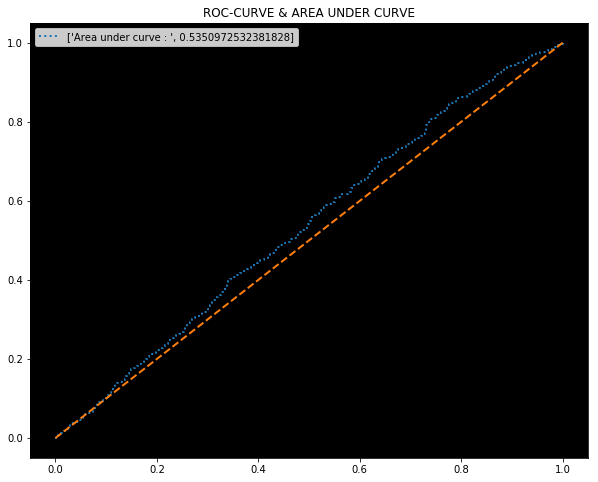

In [18]:
logit = LogisticRegression(penalty='l2')
model(logit, x_tr, y_tr, x_ts, y_ts,x_tr.columns)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy score :  0.5485436893203883
Recall score   :  0.5375939849624061
Precision score   :  0.4782608695652174
confusion matrix : 
 [[0.3171521  0.25242718]
 [0.19902913 0.23139159]]
classification report :
              precision    recall  f1-score   support

          0       0.61      0.56      0.58      1056
          1       0.48      0.54      0.51       798

avg / total       0.56      0.55      0.55      1854



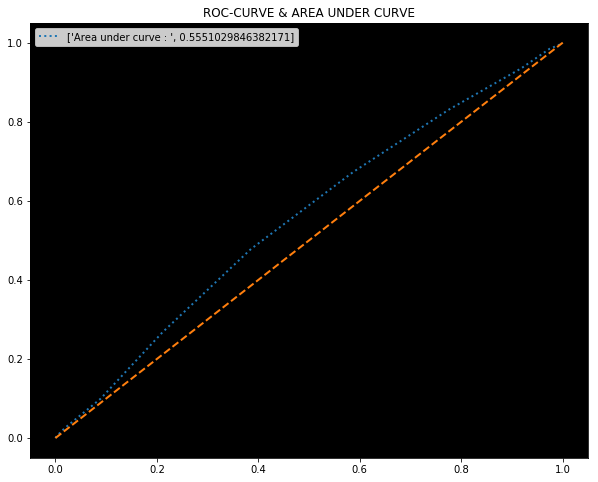

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc,x_tr, y_tr, x_ts, y_ts,x_tr.columns)

In [20]:
%%time
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
CPU times: user 2.03 ms, sys: 701 µs, total: 2.73 ms
Wall time: 2.51 ms


In [21]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {
    'max_depth': [4,5,6,8,10,15],
    'min_samples_leaf': [4,8,10],
    'min_samples_split': [4,6,8],
    'n_estimators': [10, 30, 50]
}

rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid ,
                          cv = 10, n_jobs = -1, verbose = 2)

In [45]:
grid_search.fit(x_tr,y_tr)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, m

[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    5.0s


[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.4s
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=10

[CV] max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1

[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV] max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV]  max_depth=4, min_samples_leaf=8, min_samples_split=8, n_estimators=3

[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.3s
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10 
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=6, n_

[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.3s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=10, min_samples_split=8, n_estimators=50, 

[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   22.0s


[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=5, min_samples_leaf=4, min_samples_split=6, n_estimators=30

[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=4, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1

[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.3s
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=8, min_samples_split=6, n_estimators=3

[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=4, n_e

[CV] max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.3s
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50 
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.3s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=8, n_estimators=10, 

[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=30, total=   0.3

[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.2s
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=10 
[CV]  max_dep

[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1

[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50

[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:   51.8s


[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=6, min_samples_leaf=8, min_samples_split=8, n_estimators=50

[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.4s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.2s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=6, n_e

[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.4s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10 
[CV]  max_depth=6, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.4s
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=6, min_samples_leaf=10, min_samples_split=8, n_estimators

[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.5s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=50

[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10 
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=4, n_estimators=30 
[CV]  max_dep

[CV] max_depth=8, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=6, n_estimators=50, total=   0.4s
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV] max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=8, min_samples_split=8, n_estimators=10, total=   0.1

[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=4, n_estimators=30, 

[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=50, total=   0.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=6, n_estimators=50 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[

[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.4s
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=6, n_e

[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.4s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=6, n_estimators=50, total=   0.6s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=4, min_samples_split=8, n_estimators=30, 

[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.5s
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=4, n_estimators=50, 

[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=8, min_samples_split=8, n_estimators=50, 

[Parallel(n_jobs=-1)]: Done 1272 tasks      | elapsed:  1.6min


[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=4, n_estimators=50, total=   0.5s
[CV] max_depth=10, min_samples_leaf=10, min_samples_

[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=10, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=30 
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=8, n_estimators=30, total=   0.3s
[CV] max_depth=10, min_samples_leaf=10, min_samples_

[CV] max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.7s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.7s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=4, n_estimators=50, total=   0.7s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=6, n_estimators=10, 

[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.4s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.4s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.5s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.5s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.5s
[CV]  max_depth=15, min_samples_leaf=4, min_samples_split=8, n_estimators=30, total=   0.5s
[CV] max_depth=15, min_samples_leaf=4, min_samples_split=8, n_e

[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=4, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.1s
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=6, n_estimators=10, total=   0.2s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=6, n_e

[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.5s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, total=   0.6s
[CV] max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50 
[CV]  max_depth=15, min_samples_leaf=8, min_samples_split=8, n_estimators=50, 

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=10, total=   0.1s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.3s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30 
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=6, n_estimators=30, total=   0.4s
[CV] max_depth=15, min_samples_leaf=10, min_samples_

[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.5s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.6s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.5s
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=8, n_estimators=50, total=   0.5s


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 5, 6, 8, 10, 15], 'min_samples_leaf': [4, 8, 10], 'min_samples_split': [4, 6, 8], 'n_estimators': [10, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [46]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

In [57]:
def evaluate(model, x_ts, y_ts):
    predictions = model.predict(x_ts)
    errors = abs(predictions - y_ts)
    mape = 100 * np.mean(errors)
    accuracy = 100 - mape
    print (mape)
    print('Model Performance')
    
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.4f}.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_tr,y_tr)
base_accuracy = evaluate(base_model, x_ts, y_ts)

47.950377562028045
Model Performance
Average Error: 0.4795 degrees.
Accuracy = 52.0496.


In [55]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_ts, y_ts)

47.73462783171521
Model Performance
Average Error: 0.4773 degrees.
Accuracy = 52.2654.


In [49]:
pred2 = best_grid.predict(x_ts)
recall_score(y_ts,pred2)

0.6889632107023411

In [58]:
accuracy_score(y_ts,pred2)

0.5226537216828478

In [50]:
precision_score(y_ts,pred2)

0.5049019607843137

In [51]:
tn,fp,fn,tp = confusion_matrix(y_ts, pred2).ravel()
print(tn, fp, fn, tp)

351 606 279 618


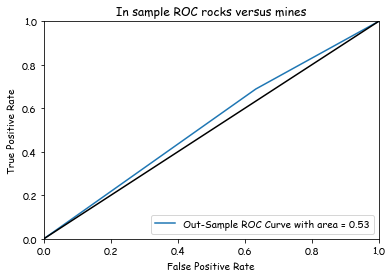

In [52]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_ts,pred2)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()

Text(0.5,0,'Relative Importance')

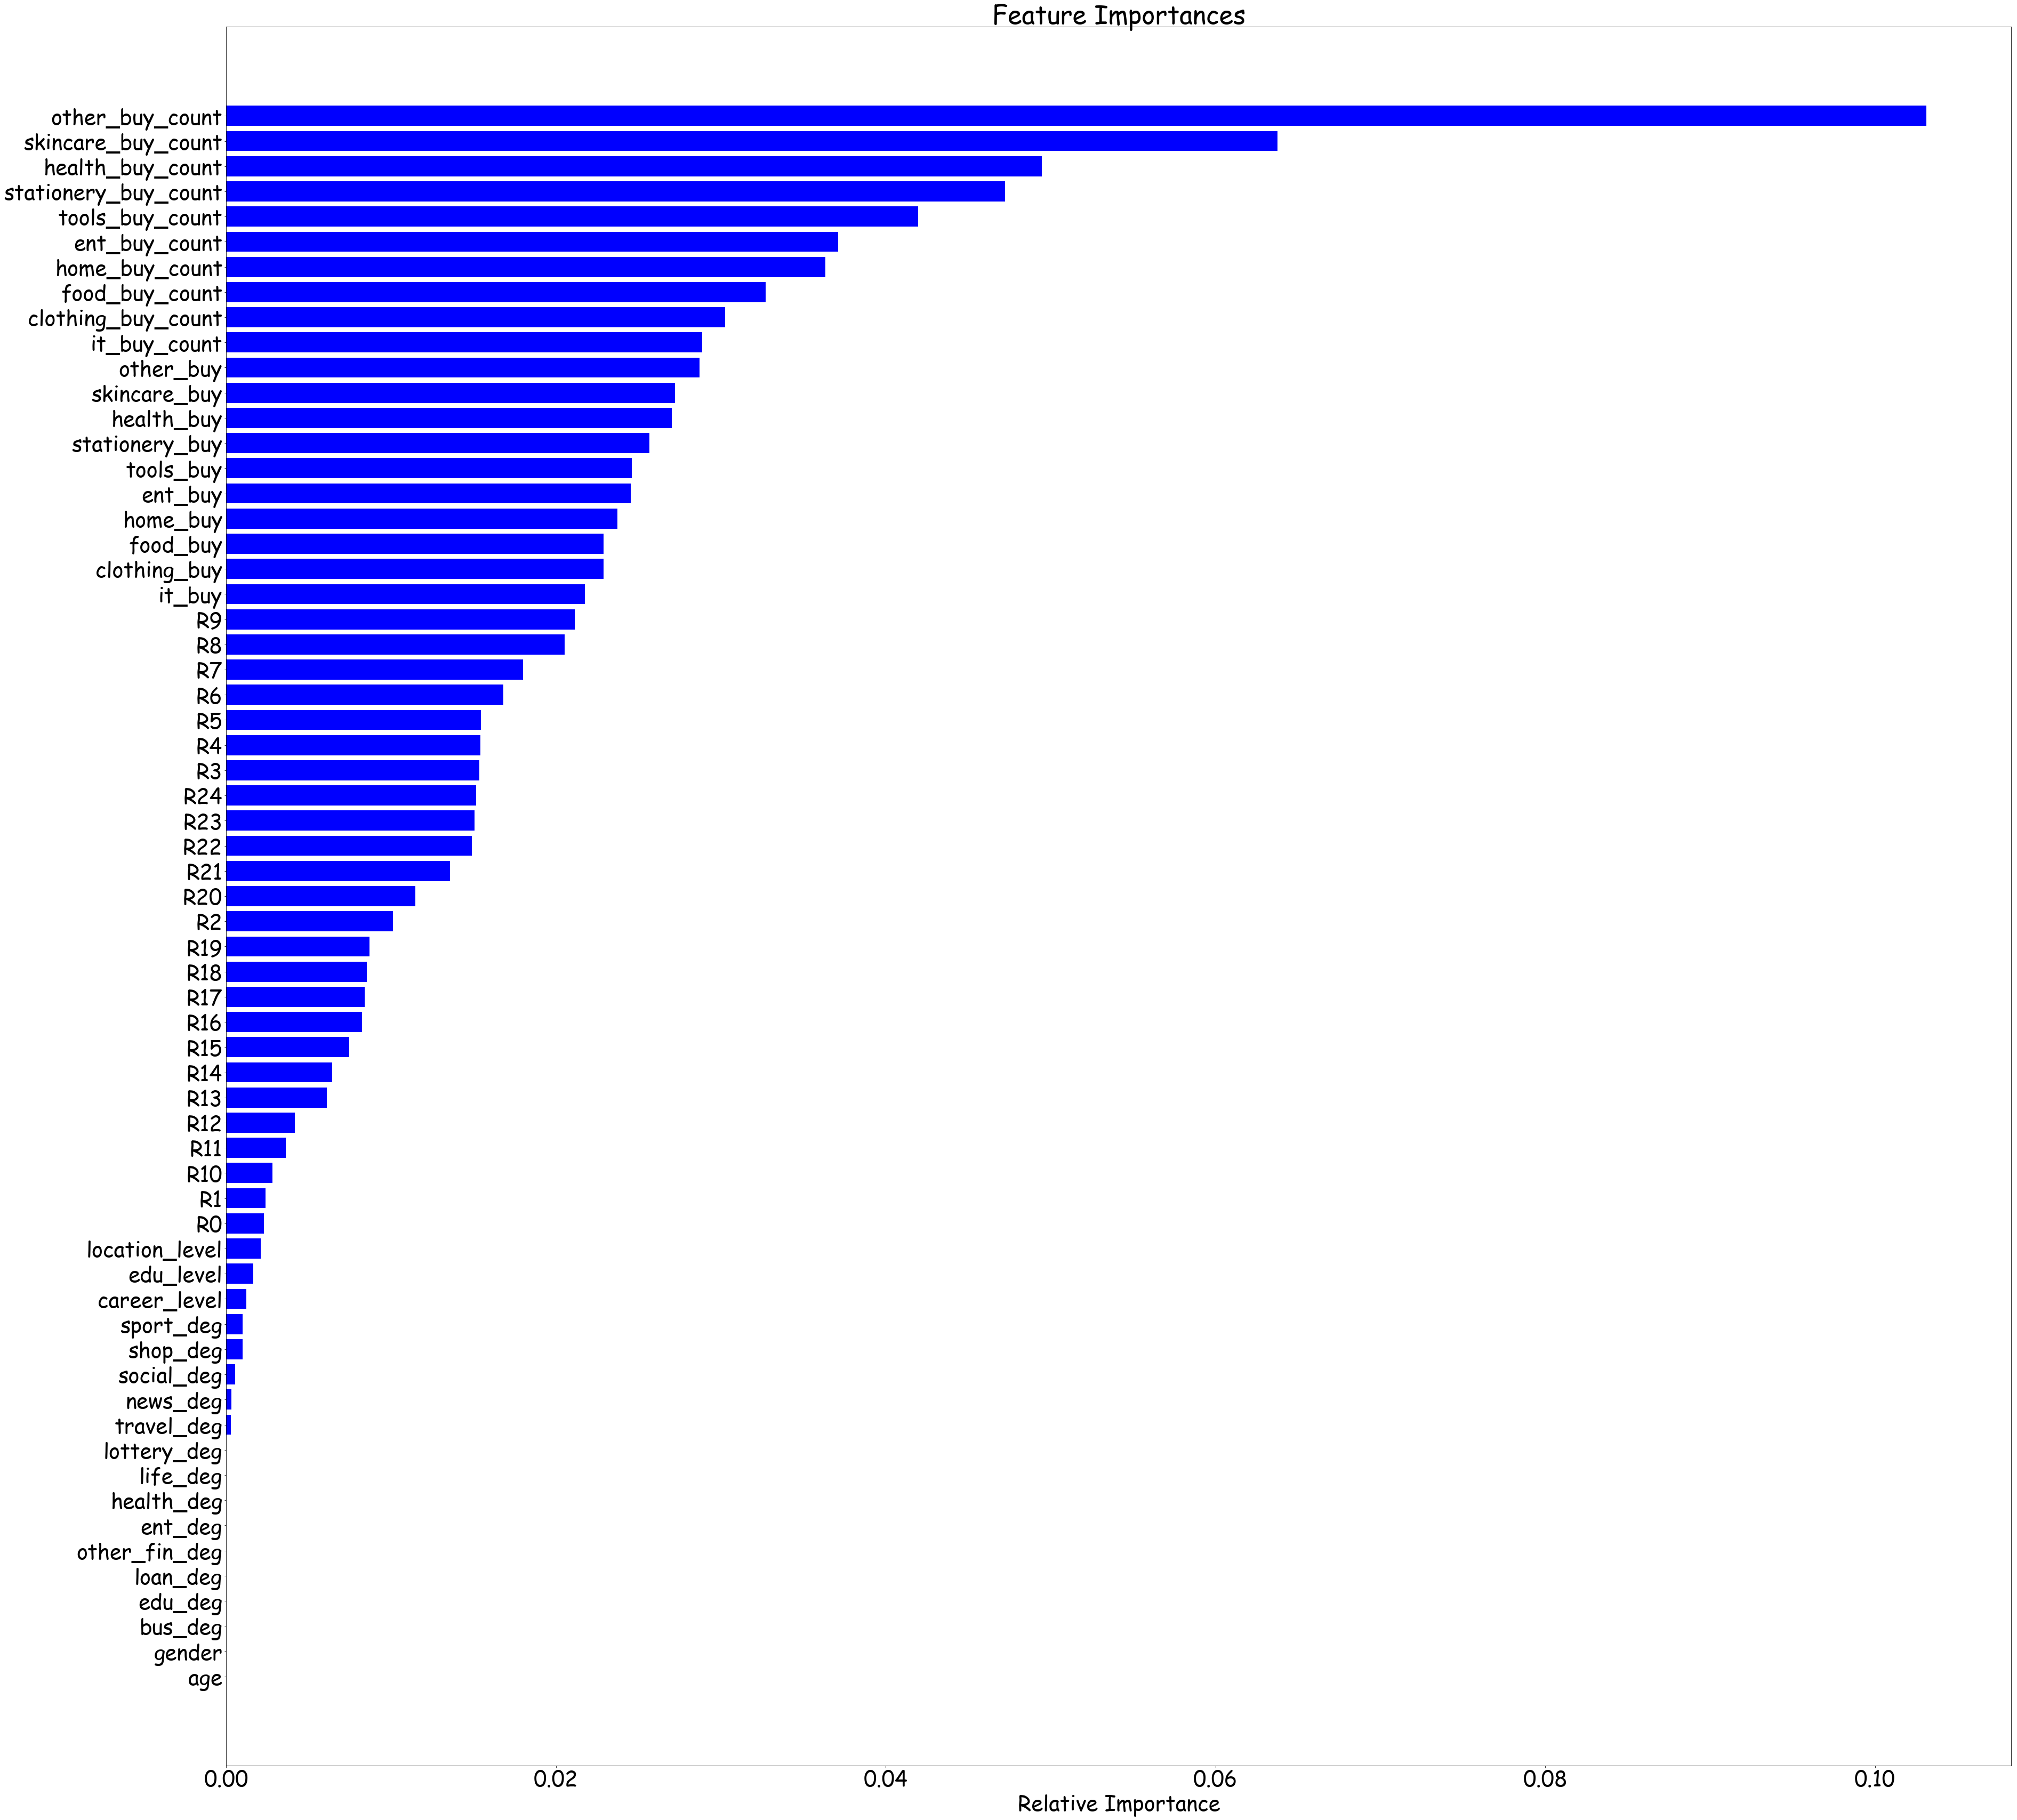

In [53]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib 
%matplotlib inline

imp = best_grid.feature_importances_
feature_names = x_tr.columns
indices = np.argsort(imp)
font = {'family' : 'Comic Sans MS',
        'size'   : 40}
matplotlib.rc('font', **font)
plt.figure(figsize=(60,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_names)
plt.xlabel('Relative Importance')